In [1]:
import numpy as np
import xarray as xr
import glob
from functools import partial
from matplotlib import pyplot as plt
import time

# Lisa's tools
import sys 
path_tools = '/home1/datahome/ljessel/Scripts/'  # path to the map toolkit directory
sys.path.append(path_tools)
from map_SAR_variables_toolkit.sar_tools.sar import preprocess_sar, map_sar

# 0) Loading file

In [2]:
fns_tot=[]

base_path = '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/'
#safe_pattern = 'S1B_IW_XSP__1SDV_202108*.SAFE'
nc_pattern = '/*vv*.nc'

#safe_pattern24 = 'S1B_IW_XSP__1SDV_20210824*.SAFE'   # pour le 24/08
#safe_pattern23 = 'S1B_IW_XSP__1SDV_20210823*.SAFE'   # pour le 23/08
#safe_pattern22 = 'S1B_IW_XSP__1SDV_20210822*.SAFE'   # pour le 22/08
#safe_pattern21 = 'S1B_IW_XSP__1SDV_20210821*.SAFE'   # pour le 21/08

safe_pattern26 = 'S1B_IW_XSP__1SDV_20211026*.SAFE'   # pour le 26/10
safe_pattern25 = 'S1B_IW_XSP__1SDV_20211025*.SAFE'   # pour le 25/10

#safes = glob.glob(base_path+safe_pattern22)+glob.glob(base_path+safe_pattern23)
safes = glob.glob(base_path+safe_pattern26) + glob.glob(base_path+safe_pattern25)
print(len(safes))

for safe in safes :
    fns_tot = fns_tot+glob.glob(safe+nc_pattern)

#print(fns_tot)
print(len(fns_tot))

11
33


In [3]:
'''
path1 = '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/'
safe1 = 'S1B_IW_XSP__1SDV_20210823T181301_20210823T181328_028377_0362CD_1745.SAFE'
fns1 = glob.glob(base_path+safe1+'/*vv*.nc')

path2 = '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/'
safe2 = 'S1B_IW_XSP__1SDV_20210823T181325_20210823T181352_028377_0362CD_78D6.SAFE'
fns2 = glob.glob(base_path+safe2+'/*vv*.nc')

fns_tot0 = fns1 + fns2
print(fns_tot0)
'''

"\npath1 = '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/'\nsafe1 = 'S1B_IW_XSP__1SDV_20210823T181301_20210823T181328_028377_0362CD_1745.SAFE'\nfns1 = glob.glob(base_path+safe1+'/*vv*.nc')\n\npath2 = '/home/datawork-cersat-public/cache/project/sarwave/data/products/tests/iw/slc/l1b/3.7/'\nsafe2 = 'S1B_IW_XSP__1SDV_20210823T181325_20210823T181352_028377_0362CD_78D6.SAFE'\nfns2 = glob.glob(base_path+safe2+'/*vv*.nc')\n\nfns_tot0 = fns1 + fns2\nprint(fns_tot0)\n"

# 1) With the intra grp 

## 1.1) Selection & preprocess of the dataset grp 

In [4]:
# if varn is'nt specified, it select all the disponible variables seteled in the preprocess function  
partial_func = partial(preprocess_sar)  # preprocessing of the "raw" netcdf

In [5]:
#ds_intra = xr.open_mfdataset(fns_tot,preprocess = partial_func,combine='nested',concat_dim='swath', group='intraburst')
#ds_intra = xr.open_mfdataset(fns_tot,preprocess = partial_func,combine='nested', coords='minimal',concat_dim='swath', group='intraburst')   # 'lambda_range_max_macs' not present in all datasets and coords='different'. Either add 'lambda_range_max_macs' to datasets where it is missing or specify coords='minimal'
ds_intra = xr.open_mfdataset(fns_tot,preprocess = partial_func,combine='nested', coords='minimal', compat='override', concat_dim='swath', group='intraburst')   # conflicting values for variable 'line' on objects to be combined. Can be skiped by specifying compat='override'
display(ds_intra) 

<xarray.Dataset> Size: 96kB
Dimensions:                   (burst: 10, lambda_range_max_macs: 1,
                               tile_line: 1, tile_sample: 5, fprt: 10,
                               swath: 33, 2tau: 1, c_sample: 2, c_line: 2)
Coordinates:
  * burst                     (burst) int16 20B 0 1 2 3 4 5 6 7 8 9
  * lambda_range_max_macs     (lambda_range_max_macs) float32 4B 50.0
  * tile_line                 (tile_line) int64 8B 0
  * tile_sample               (tile_sample) int64 40B 0 1 2 3 4
  * fprt                      (fprt) int64 80B 0 1 2 3 4 5 6 7 8 9
    pol                       <U2 8B ...
    line                      (burst, tile_line) float32 40B dask.array<chunksize=(10, 1), meta=np.ndarray>
    sample                    (burst, tile_sample) float32 200B dask.array<chunksize=(10, 5), meta=np.ndarray>
    longitude                 (burst, tile_line, tile_sample) float32 200B dask.array<chunksize=(10, 1, 5), meta=np.ndarray>
    latitude                  (burst, tile_line, tile_sample) float32 200B dask.array<chunksize=(10, 1, 5), meta=np.ndarray>
Dimensions without coordinates: swath, 2tau, c_sample, c_line
Data variables:
    sigma0_filt               (swath, burst, tile_line, tile_sample) float32 7kB dask.array<chunksize=(1, 10, 1, 5), meta=np.ndarray>
    normalized_variance_filt  (swath, burst, tile_line, tile_sample) float32 7kB dask.array<chunksize=(1, 10, 1, 5), meta=np.ndarray>
    macs_Re                   (swath, burst, tile_line, tile_sample, lambda_range_max_macs, 2tau) float32 7kB dask.array<chunksize=(1, 10, 1, 5, 1, 1), meta=np.ndarray>
    macs_Im                   (swath, burst, tile_line, tile_sample, lambda_range_max_macs, 2tau) float32 7kB dask.array<chunksize=(1, 10, 1, 5, 1, 1), meta=np.ndarray>
    corner_latitude           (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 26kB dask.array<chunksize=(1, 10, 1, 5, 2, 2), meta=np.ndarray>
    corner_longitude          (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 26kB dask.array<chunksize=(1, 10, 1, 5, 2, 2), meta=np.ndarray>
    land_flag                 (swath, burst, tile_line, tile_sample) float64 13kB dask.array<chunksize=(1, 10, 1, 5), meta=np.ndarray>
    footprt                   (swath, fprt) float64 3kB 15.6 34.73 ... 18.47
    start                     (swath) datetime64[ns] 264B 2021-10-26T04:57:09...
    stop                      (swath) datetime64[ns] 264B 2021-10-26T04:57:34...
Attributes: (12/24)
    name:                   SENTINEL1_DS:/home/datawork-cersat-public/project...
    short_name:             SENTINEL1_DS:S1B_IW_SLC__1SDV_20211026T045709_202...
    product:                SLC
    safe:                   S1B_IW_SLC__1SDV_20211026T045709_20211026T045736_...
    swath:                  IW
    multidataset:           False
    ...                     ...
    radar_frequency:        5405000454.33435
    azimuth_time_interval:  0.002055556299999998
    tile_width_sample:      17500
    tile_width_line:        17500
    tile_overlap_sample:    0
    tile_overlap_line:      0

<div class="alert alert-block alert-info">
<b>Tip:</b> if the wanted variable as a dimension other than positional dimensions (burst,tile_line,tile_sample), e.g., (burst,tile_line,tile_sample,<b>2tau</b>), you can specify the value of the new dimension to be selected. For instance, 
    
```python
varn = ['macs_Im']
dims_sel = {'lambda_range_max_macs':50,'2tau':0}
partial_func = partial(preprocess_sar, varn=varn,dims_sel = dims_sel)
ds = xr.open_mfdataset(fn,combine    = 'nested',concat_dim = 'swath',preprocess = partial_func,group='intraburst').load()
```

</div>

## 1.2) Plotting SAR 

<div class="alert alert-block alert-warning">
<b>Important note:</b> to be able to plot SAR geometries, the netCDFs should contain corner_latitude and corner_longitude variables
</div>

In [6]:
# For NRCS
map_sar(ds_intra,'sigma0_filt',
        cmap = plt.cm.Greys, 
        land_mask=ds_intra.land_flag, 
        title='all intraburst sub-swath of NRCS (08/2021)', 
        clbl=r'$\sigma_0^{filt}$ [u.a]')

#plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_iw_intra_22__24_08.png')

URLError: <urlopen error [Errno 101] Network is unreachable>

URLError: <urlopen error [Errno 101] Network is unreachable>

<Figure size 800x800 with 1 Axes>

execution time: 168.51175379753113 sec


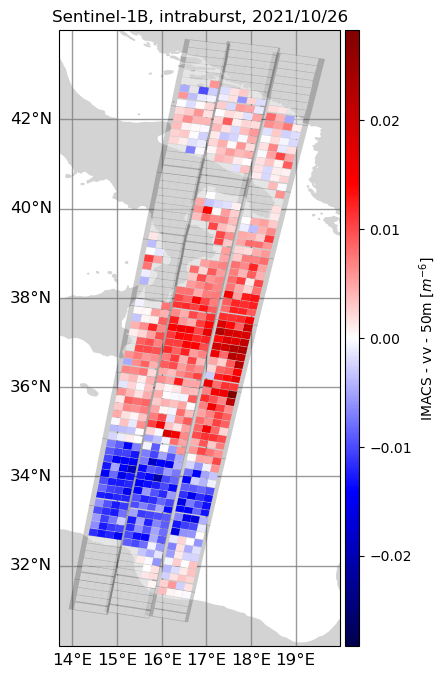

In [10]:
# For imacs
init_time = time.time()  

map_sar(ds_intra,'macs_Im', 
        land_mask=ds_intra.land_flag, 
        diverging = True,
        cmap=plt.cm.seismic,
        lonextent = [13.7, 20],
        latextent = [30.2, 44],
        title='Sentinel-1B, intraburst, 2021/10/26', 
        clbl='IMACS - vv - 50m [$m^{-6}$]')

end_time = time.time() 

exec_time = end_time - init_time

print("execution time:", exec_time, "sec")
plt.savefig('/home1/datahome/ljessel/Plots/MACS_analysis/map_Imacs_iw_intra_26_10.png')

# 2. Interburst 

## 2.1) Selection & preprocess of the dataset grp 

In [7]:
ds_inter = xr.open_mfdataset(fns_tot,preprocess = partial_func,combine='nested', coords='minimal', compat='override', concat_dim='swath', group='interburst')   # conflicting values for variable 'line' on objects to be combined. Can be skiped by specifying compat='override'
display(ds_inter)

<xarray.Dataset> Size: 87kB
Dimensions:                   (burst: 9, lambda_range_max_macs: 1,
                               tile_line: 1, tile_sample: 5, fprt: 10,
                               swath: 33, c_sample: 2, c_line: 2)
Coordinates:
  * burst                     (burst) int16 18B 0 1 2 3 4 5 6 7 8
  * lambda_range_max_macs     (lambda_range_max_macs) float32 4B 50.0
  * tile_line                 (tile_line) int64 8B 0
  * tile_sample               (tile_sample) int64 40B 0 1 2 3 4
  * fprt                      (fprt) int64 80B 0 1 2 3 4 5 6 7 8 9
    pol                       <U2 8B ...
    line                      (burst, tile_line) float32 36B dask.array<chunksize=(9, 1), meta=np.ndarray>
    sample                    (burst, tile_sample) float32 180B dask.array<chunksize=(9, 5), meta=np.ndarray>
    longitude                 (burst, tile_line, tile_sample) float32 180B dask.array<chunksize=(9, 1, 5), meta=np.ndarray>
    latitude                  (burst, tile_line, tile_sample) float32 180B dask.array<chunksize=(9, 1, 5), meta=np.ndarray>
Dimensions without coordinates: swath, c_sample, c_line
Data variables:
    sigma0_filt               (swath, burst, tile_line, tile_sample) float32 6kB dask.array<chunksize=(1, 9, 1, 5), meta=np.ndarray>
    normalized_variance_filt  (swath, burst, tile_line, tile_sample) float32 6kB dask.array<chunksize=(1, 9, 1, 5), meta=np.ndarray>
    macs_Re                   (swath, burst, tile_line, tile_sample, lambda_range_max_macs) float32 6kB dask.array<chunksize=(1, 9, 1, 5, 1), meta=np.ndarray>
    macs_Im                   (swath, burst, tile_line, tile_sample, lambda_range_max_macs) float32 6kB dask.array<chunksize=(1, 9, 1, 5, 1), meta=np.ndarray>
    corner_latitude           (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 24kB dask.array<chunksize=(1, 9, 1, 5, 2, 2), meta=np.ndarray>
    corner_longitude          (swath, burst, tile_line, tile_sample, c_sample, c_line) float32 24kB dask.array<chunksize=(1, 9, 1, 5, 2, 2), meta=np.ndarray>
    land_flag                 (swath, burst, tile_line, tile_sample) float64 12kB dask.array<chunksize=(1, 9, 1, 5), meta=np.ndarray>
    footprt                   (swath, fprt) float64 3kB 15.6 34.73 ... 18.47
    start                     (swath) datetime64[ns] 264B 2021-10-26T04:57:09...
    stop                      (swath) datetime64[ns] 264B 2021-10-26T04:57:34...
Attributes: (12/22)
    name:                   SENTINEL1_DS:/home/datawork-cersat-public/project...
    short_name:             SENTINEL1_DS:S1B_IW_SLC__1SDV_20211026T045709_202...
    product:                SLC
    safe:                   S1B_IW_SLC__1SDV_20211026T045709_20211026T045736_...
    swath:                  IW
    multidataset:           False
    ...                     ...
    mean_incidence:         44.0066880990281
    azimuth_time_interval:  0.002055556299999998
    tile_width_sample:      17500
    tile_width_line:        17500
    tile_overlap_sample:    0
    tile_overlap_line:      0

## 2.2) Plotting

execution time: 144.20728874206543 sec


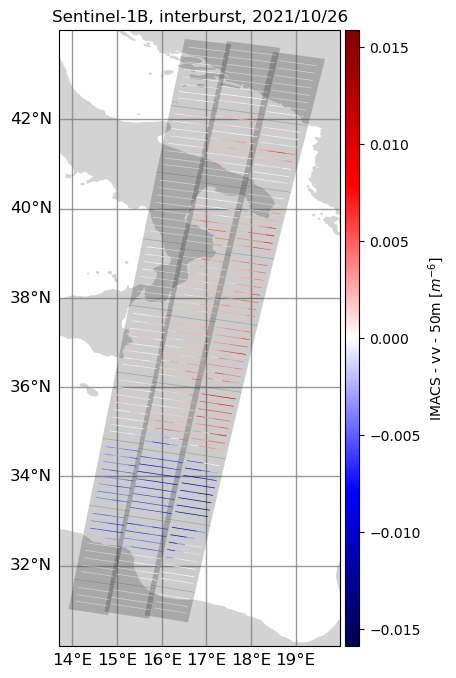

In [11]:
init_time = time.time()  

map_sar(ds_inter,'macs_Im', 
        land_mask=ds_inter.land_flag, 
        diverging = True,
        cmap=plt.cm.seismic,
        lonextent = [13.7, 20],
        latextent = [30.2, 44],
        title='Sentinel-1B, interburst, 2021/10/26', 
        clbl='IMACS - vv - 50m [$m^{-6}$]')

end_time = time.time() 

exec_time = end_time - init_time

print("execution time:", exec_time, "sec")
plt.savefig('/home1/datahome/ljessel/Plots/MACS_analysis/map_Imacs_iw_inter_26_10.png')

# 3) intra & inter 

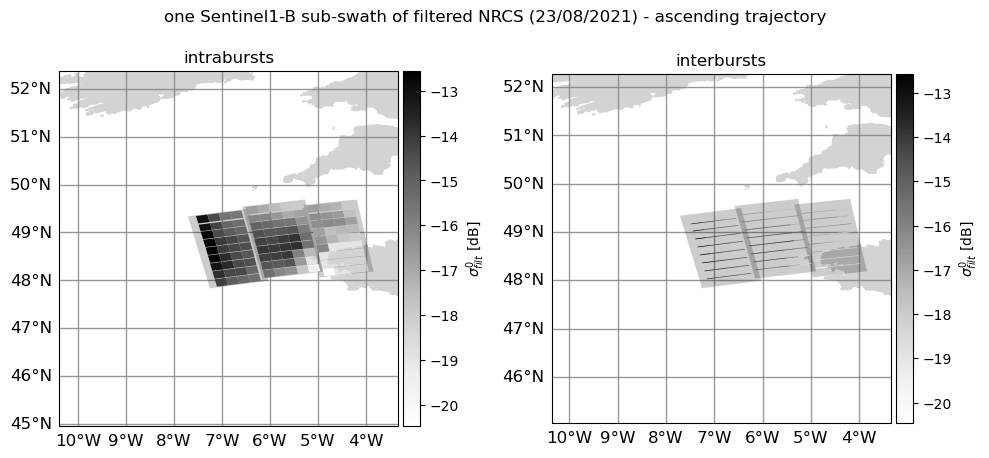

In [16]:
import cartopy.crs as ccrs
proj=ccrs.PlateCarree()

fig = plt.figure(figsize=(10,15))

map_sar(ds_intra,'macs_Im', 
        ax=fig.add_subplot(1,2,1, projection=proj),
        land_mask=ds_intra.land_flag, 
        diverging = True,
        cmap=plt.cm.seismic,
        lonextent = [13.7, 20],
        latextent = [31.2, 44],
        title=' slice of IMACS, 2021/10/26, Sentinel-1B', 
        clbl='IMACS [u.a]')

map_sar(ds_inter,'macs_Im', 
        ax=fig.add_subplot(1,2,2, projection=proj),
        land_mask=ds_intra.land_flag, 
        diverging = True,
        cmap=plt.cm.seismic,
        lonextent = [13.7, 20],
        latextent = [31.2, 44],
        title=' slice of IMACS, 2021/10/26, Sentinel-1B', 
        clbl='IMACS [u.a]')


plt.tight_layout()
plt.suptitle('one Sentinel1-B sub-swath of filtered NRCS (23/08/2021) - ascending trajectory')
plt.draw()

plt.savefig('/home1/datahome/ljessel/Plots/NRCS_data_discover/nrcs_s1b_allsubswath_intra&inter_230821T1813.png')